To build an ML model and predict the sales of each product from each outlet. The participants also need to use the model to analyse the properties of the product in the stores and find ways to increase sales.

Data attributes: Item_ID: Item Identification Number Item_W: Item Weight Item_Type: Item Item_MRP: MRP of the Product Outlet_ID: Outlet ID Outlet_Year: Outlet Establishment year Outlet_Size: Size of the outlet Outlet_Type: Type of the outlet Sales: Total sales from the outle

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [4]:
test.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3


In [5]:
train.shape,test.shape

((87864, 9), (37656, 8))

In [6]:
train.dtypes

Item_ID                  object
Item_W                  float64
Item_Type                object
Item_MRP                float64
Outlet_ID                object
Outlet_Year               int64
Outlet_Size              object
Outlet_Location_Type     object
Sales                   float64
dtype: object

In [7]:
test.dtypes

Item_ID                  object
Item_W                  float64
Item_Type                object
Item_MRP                float64
Outlet_ID                object
Outlet_Year               int64
Outlet_Size              object
Outlet_Location_Type     object
dtype: object

In [8]:
train.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [9]:
test.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
dtype: int64

In [10]:
train.drop(columns=['Item_ID'],axis = 1,inplace = True)

In [11]:
train.groupby('Item_Type')['Item_MRP','Item_W'].mean()

<ipython-input-11-afa1baf55959>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('Item_Type')['Item_MRP','Item_W'].mean()


,Item_MRP,Item_W
Item_Type,,
Baking Goods,150.702459,15.053796
Breads,147.199312,15.270986
Breakfast,156.858735,16.637266
Canned,153.352637,16.179592
Dairy,155.376347,16.564873
Frozen Foods,154.739848,16.436911
Fruits and Vegetables,147.637898,15.340384
Hard Drinks,151.503811,14.901788
Health and Hygiene,154.309473,16.252626


In [12]:
train.groupby(['Outlet_Size','Outlet_Location_Type'])['Sales'].count()

Outlet_Size  Outlet_Location_Type
High         Tier 1                   3807
             Tier 2                   3059
             Tier 3                   5701
Medium       Tier 1                   4995
             Tier 2                   3417
             Tier 3                  18271
Small        Tier 1                  24765
             Tier 2                  18777
             Tier 3                   5072
Name: Sales, dtype: int64

<AxesSubplot:>

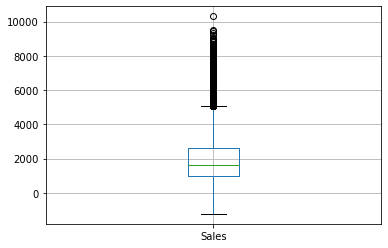

In [13]:
train.boxplot(column = 'Sales')

In [14]:
q1 = train.quantile(q = 0.25)
q3 = train.quantile(q = 0.75)
iqr = q3 - q1
print('IQR for train :',iqr)

IQR for train : Item_W            9.001278
Item_MRP         84.687030
Outlet_Year       7.000000
Sales          1648.808061
dtype: float64


In [15]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [16]:
lowprice,uppprice = remove_outlier(train['Sales'])
train['Sales']=np.where(train['Sales']>uppprice,uppprice,train['Sales'])
train['Sales']=np.where(train['Sales']<lowprice,lowprice,train['Sales'])

In [17]:
lowprice,uppprice = remove_outlier(train['Item_MRP'])
train['Item_MRP']=np.where(train['Item_MRP']>uppprice,uppprice,train['Item_MRP'])
train['Item_MRP']=np.where(train['Item_MRP']<lowprice,lowprice,train['Item_MRP'])

In [18]:
train.drop(['Item_Type','Outlet_ID'],axis=1,inplace = True)

In [19]:
df = pd.get_dummies(train)

In [20]:
df.dtypes

Item_W                         float64
Item_MRP                       float64
Outlet_Year                      int64
Sales                          float64
Outlet_Size_High                 uint8
Outlet_Size_Medium               uint8
Outlet_Size_Small                uint8
Outlet_Location_Type_Tier 1      uint8
Outlet_Location_Type_Tier 2      uint8
Outlet_Location_Type_Tier 3      uint8
dtype: object

In [21]:
test.drop(['Item_ID','Item_Type','Outlet_ID'],axis = 1,inplace = True)

In [22]:
df1 = pd.get_dummies(test)

In [23]:
X = df.drop(columns=['Sales'])
y = df['Sales']
X_test = df1

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.25, random_state=0)

In [25]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [26]:
def backward_elimination(df, target,significance_level = 0.05):
    features = df.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(df[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

features = backward_elimination(X_train,y_train)

In [27]:
features = list(set(features))

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()


In [30]:
model_ls = [(lr, 'Linear Regression'),(ls, 'Lasso'),(rd, 'Ridge'),(dr, 'Decission Tree Reg')]

# Iterate over each model

for item in model_ls:
    model = item[0]
    name = item[1]
    print(f'Running {name}')
    print('')


# Train the model

    model.fit(X_train[features], y_train)

# predict the results

    pred = model.predict(X_test[features])

# calculate the root mean squared error

    error = round(np.sqrt(mean_squared_error(y_test, pred)),2)

# print the value

    print (f'Root mean squared error using {name}is {error}')
    print ('-'*100)
    print('')

Running Linear Regression

Root mean squared error using Linear Regressionis 1218.31
----------------------------------------------------------------------------------------------------

Running Lasso

Root mean squared error using Lassois 1218.38
----------------------------------------------------------------------------------------------------

Running Ridge

Root mean squared error using Ridgeis 1218.31
----------------------------------------------------------------------------------------------------

Running Decission Tree Reg

Root mean squared error using Decission Tree Regis 1726.49
----------------------------------------------------------------------------------------------------



In [31]:
lr.fit(X_train[features],y_train)

LinearRegression()

In [32]:
pred = lr.predict(df1[features])

In [33]:
df2 = { 
        "Sales": pd.Series(pred) 
       } 
df2 = pd.concat(df2, 
               axis = 1) 
df2.head()

df2.to_csv('Submission1.csv', index=False)